In [3]:
import numpy as np
from matplotlib import ticker
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-colorblind')

# UF6

In [86]:
DOS=[[-14.7668, 4.12311*10**-6, 3.74166*10**-6, 0.307597, 2.23607*10**-6, 
  0.735113], [-14.7668, 1.73205*10**-6, 2.82843*10**-6, 0.307597, 
  2.23607*10**-6, 0.735113], [-14.1809, 1.73205*10**-6, 4.24264*10**-6, 
  0.235721, 9.27362*10**-6, 0.705214], [-14.1809, 0.0000109545, 
  4.12311*10**-6, 0.235721, 7.14143*10**-6, 0.705214], [-14.1809, 
  6.40312*10**-6, 3.74166*10**-6, 0.23572, 6.40312*10**-6, 
  0.705213], [-13.7831, 6.40312*10**-6, 0.151845, 5.*10**-6, 0.268094, 
  0.706604], [-13.7831, 7.81025*10**-6, 0.151846, 6.32456*10**-6, 
  0.268094, 0.706407], [-13.7831, 4.12311*10**-6, 0.151848, 
  8.30662*10**-6, 0.268095, 0.706646], [-13.3393, 0.819087, 
  5.19615*10**-6, 4.24264*10**-6, 0.0000174069, 0.788335], [-13.2792, 
  0.0000518363, 5.65685*10**-6, 2.*10**-6, 0.202034, 
  0.74289], [-13.2792, 0.0000162788, 4.*10**-6, 5.09902*10**-6, 
  0.202034, 0.744516], [-13.2792, 0.0000430697, 3.60555*10**-6, 
  5.65685*10**-6, 0.202035, 0.742944], [-12.3096, 4.79583*10**-6, 
  4.79583*10**-6, 1.*10**-6, 3.87298*10**-6, 0.83308], [-12.3096, 
  6.40312*10**-6, 0.0000121244, 2.82843*10**-6, 6.16441*10**-6, 
  0.83308], [-12.3096, 1.73205*10**-6, 0.0000106771, 1.*10**-6, 
  6.7082*10**-6, 0.83308], [-11.7676, 2.*10**-6, 0.521221, 
  1.41421*10**-6, 0.202003, 0.775657], [-11.7676, 3.74166*10**-6, 
  0.521221, 1.41421*10**-6, 0.202003, 0.771768], [-11.7676, 1.*10**-6, 
  0.52122, 1.41421*10**-6, 0.202002, 0.772441], [-5.75548, 0., 0., 0., 
  0.716932, 0.00639562], [-5.14731, 0., 0., 0., 0.704859, 
  0.293849], [-5.14731, 0., 0., 0., 0.704859, 0.293858], [-5.14731, 
  0., 0., 0., 0.70486, 0.293862], [-4.02184, 0., 0.375605, 0., 
  0.669542, 0.448927], [-4.02184, 0., 0.375605, 0., 0.669543, 
  0.448927], [-4.02184, 0., 0.375603, 0., 0.669543, 0.4493]]

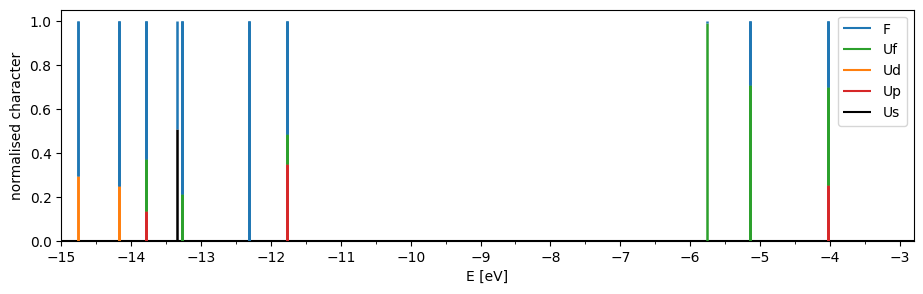

In [146]:
color = ["black","tab:red","tab:orange","tab:green","tab:blue"]
label = ["Us","Up","Ud","Uf","F"]

fig, ax = plt.subplots()
fig.set_size_inches(11, 3)
ax.plot([-16,-2],[0,0],"k")
ax.set_xlim(-15,-2.8)
ax.set_ylim(0,1.05)
ax.set_ylabel("normalised character")
ax.set_xlabel("E [eV]")
for peak in DOS:
    E = peak[0]
    rho = peak[1:]
    rho = rho/np.sum(rho)
    rho = [0, *rho]
    h = 0
    for i in range(len(rho)-1):
        h += rho[i]
        ax.vlines(E,h,h + rho[i+1],color=color[i],linewidth=1.8)

loc = ticker.MultipleLocator(1)
ax.xaxis.set_major_locator(loc)
loc = ticker.MultipleLocator(.5)
ax.xaxis.set_minor_locator(loc)

# for labels
for i in range(len(color)):
    ax.vlines(-30,-1,1,color=color[i],label=label[i])
plt.legend(reverse=True)
plt.savefig("UF6_dos.png",dpi=600, bbox_inches="tight")
plt.show()

# Sr3UO6

In [116]:
def plot_bands(path):
    band = np.loadtxt("Bands/"+path+"/+band",comments='#').T
    wanband = np.loadtxt("Bands/"+path+"/+wanband",comments='#').T
    wanbandtb = np.loadtxt("Bands/"+path+"/+wanbandtb",comments='#').T
    for i in range(len(band)-2):
        plt.plot(band[0],band[i+1],color='black')
    plt.plot(band[0],band[i+1],color='black',label="before downfolding")
    #for i in range(len(wanband)-1):
    #    plt.plot(wanband[0],wanband[i+1],color='red')
    for i in range(len(wanbandtb)-2):
        plt.plot(wanbandtb[0],wanbandtb[i+1],color='tab:orange',alpha=0.9) 
    plt.plot(wanbandtb[0],wanbandtb[-1],color='tab:orange',alpha=0.9,label="after downfolding")   
    
    plt.vlines(band[0][22],-1000,1000,color="dimgray")
    plt.vlines(band[0][53],-1000,1000,color="black")
    plt.vlines(band[0][92],-1000,1000,color="dimgray")
    plt.vlines(band[0][125],-1000,1000,color="black")
    plt.vlines(band[0][164],-1000,1000,color="dimgray")
    plt.vlines(band[0][210],-1000,1000,color="black")
    plt.xticks([0, band[0][22] ,band[0][53],band[0][92],band[0][125],band[0][164],band[0][210],4],
                ["R","$\Gamma$","Z|V","$\Gamma$","Y|U","$\Gamma$","T|X","$\Gamma$"])
    plt.ylabel("E [eV]")
    plt.xlim(0,4)

def read_bweights(path):
    i=0
    with open("Bands/"+path+"/+bweights",'r') as file:
        for line in file:
            if i==0:
                band_number = int(line.split()[4])
            if i==1:
                band_names = line.replace(" (","(").split()[1:]
                break
            i+=1
    raw = np.loadtxt("Bands/"+path+"/+bweights",comments='#').T
    print(int(len(raw[0])/band_number))
    bands = {}
    for i,band in enumerate(raw):
        reshaped = np.resize(band,[int(len(band)/band_number),band_number])
        bands[band_names[i]] = reshaped.T
    return bands
        
def plot_bweights(path,weights,color):
    band =read_bweights(path)
    for i in range(len(band["ik"])):
        plt.plot(band["ik"][i],band["e(k,n)"][i],"k")
    for j,weight in enumerate(weights):
        w=np.zeros([len(band["ik"]),len(band["ik"][0])])
        for key in band.keys():
            if not key in ["ik","e(k,n)"]:
                k_red = key.replace("("," ").replace(")"," ").split()
                k_red = k_red[0]+k_red[2][:2]
                if k_red == weight:
                    w+=np.abs(band[key])
        if np.sum(w)!=0:
            w = w/np.max(w)
            for i in range(len(band["ik"])):
                plt.scatter(band["ik"][i],band["e(k,n)"][i],s=4*w[i]**2,alpha=0.3,color=color[j],zorder=100)
    for i,weight in enumerate(weights):
        plt.vlines(-10,-10,-9,label=weight,color=color[i])
        
    plt.vlines(band["ik"][0][22],-1000,1000,color="dimgray",zorder=200)
    plt.vlines(band["ik"][0][53],-1000,1000,color="black",zorder=200)
    plt.vlines(band["ik"][0][92],-1000,1000,color="dimgray",zorder=200)
    plt.vlines(band["ik"][0][125],-1000,1000,color="black",zorder=200)
    plt.vlines(band["ik"][0][164],-1000,1000,color="dimgray",zorder=200)
    plt.vlines(band["ik"][0][210],-1000,1000,color="black",zorder=200)
    plt.xticks([0, band["ik"][0][22] ,band["ik"][0][53],band["ik"][0][92],band["ik"][0][125],band["ik"][0][164],band["ik"][0][210],4],
                ["R","$\Gamma$","Z|V","$\Gamma$","Y|U","$\Gamma$","T|X","$\Gamma$"])
    plt.ylabel("E [eV]")
    plt.xlim(0,4)

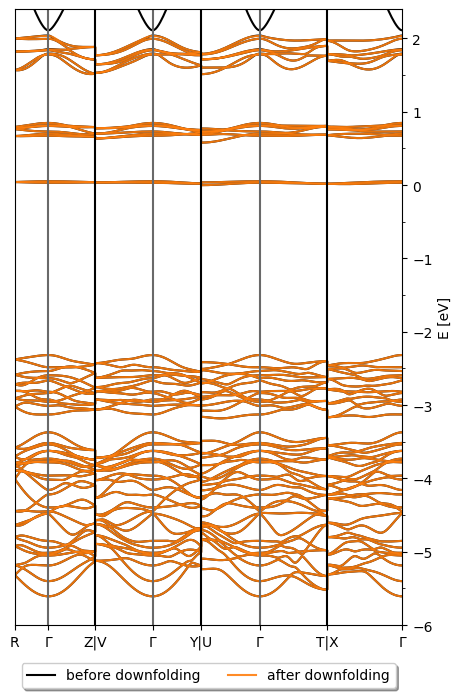

In [117]:
plt.figure(figsize=(5,8))
plot_bands("Sr3UO6")
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
loc = ticker.MultipleLocator(.5)
plt.gca().yaxis.set_minor_locator(loc)
plt.ylim(-6,2.4)
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.savefig("Sr3UO6_band_wanband.png",dpi=600, bbox_inches="tight")
plt.show()

261


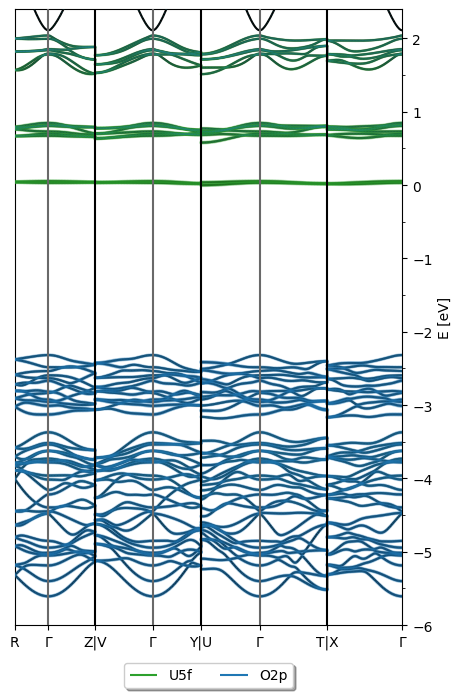

In [108]:
plt.figure(figsize=(5,8))
weights=["U5f","O2p"]
Color = ["tab:green","tab:blue"]
plot_bweights("Sr3UO6",weights,Color)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
loc = ticker.MultipleLocator(.5)
plt.gca().yaxis.set_minor_locator(loc)
plt.ylim(-6,2.4)
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.savefig("Sr3UO6_band.png",dpi=600, bbox_inches="tight")
plt.show()

# Ba3UO6

In [120]:
def plot_bands(path):
    band = np.loadtxt("Bands/"+path+"/+band",comments='#').T
    wanband = np.loadtxt("Bands/"+path+"/+wanband",comments='#').T
    wanbandtb = np.loadtxt("Bands/"+path+"/+wanbandtb",comments='#').T
    for i in range(len(band)-2):
        plt.plot(band[0],band[i+1],color='black')
    plt.plot(band[0],band[i+1],color='black',label="before downfolding")
    #for i in range(len(wanband)-1):
    #    plt.plot(wanband[0],wanband[i+1],color='red')
    for i in range(len(wanbandtb)-2):
        plt.plot(wanbandtb[0],wanbandtb[i+1],color='tab:orange',alpha=0.9) 
    plt.plot(wanbandtb[0],wanbandtb[-1],color='tab:orange',alpha=0.9,label="after downfolding")   
    
    plt.vlines(band[0][43],-1000,1000,color="dimgray")
    plt.vlines(band[0][87],-1000,1000,color="black")
    plt.vlines(band[0][137],-1000,1000,color="dimgray")
    plt.vlines(band[0][180],-1000,1000,color="black")
    plt.vlines(band[0][231],-1000,1000,color="dimgray")
    plt.vlines(band[0][282],-1000,1000,color="black")
    plt.xticks([0, band[0][43] ,band[0][87],band[0][137],band[0][180],band[0][231],band[0][282],4.5],
                ["R","$\Gamma$","Z|V","$\Gamma$","Y|U","$\Gamma$","T|X","$\Gamma$"])
    plt.ylabel("E [eV]")
    plt.xlim(0,4.5)

def read_bweights(path):
    i=0
    with open("Bands/"+path+"/+bweights",'r') as file:
        for line in file:
            if i==0:
                band_number = int(line.split()[4])
            if i==1:
                band_names = line.replace(" (","(").split()[1:]
                break
            i+=1
    raw = np.loadtxt("Bands/"+path+"/+bweights",comments='#').T
    bands = {}
    for i,band in enumerate(raw):
        reshaped = np.resize(band,[int(len(band)/band_number),band_number])
        bands[band_names[i]] = reshaped.T
    return bands
        
def plot_bweights(path,weights,color):
    band = read_bweights(path)
    w=[]
    for i in range(len(band["ik"])):
        plt.plot(band["ik"][i],band["e(k,n)"][i],"k")
    for j,weight in enumerate(weights):
        w.append(np.zeros([len(band["ik"]),len(band["ik"][0])]))
        for key in band.keys():
            if not key in ["ik","e(k,n)"]:
                k_red = key.replace("("," ").replace(")"," ").split()
                k_red = k_red[0]+k_red[2][:2]
                if k_red == weight:
                    w[-1]+=np.abs(band[key])
        if np.sum(w[-1])!=0:
            #print(idx)
            w[-1] = w[-1]/np.max(w[-1])
    w=np.array(w)
    #print(len(w[:,0]))
    #print(len(w[0]))
    for i in range(len(band["ik"])):
        idx = np.argsort(np.max(w[:,i],axis=1))
        #print(idx)
        for j in idx:
            plt.scatter(band["ik"][i],band["e(k,n)"][i],s=4*(w[j][i])**2,alpha=0.6,color=color[j],zorder=100)
    for i,weight in enumerate(weights):
         plt.vlines(-10,-10,-9,label=weight,color=color[i])
    
    plt.vlines(band["ik"][0][43],-1000,1000,color="dimgray")
    plt.vlines(band["ik"][0][87],-1000,1000,color="black")
    plt.vlines(band["ik"][0][137],-1000,1000,color="dimgray")
    plt.vlines(band["ik"][0][180],-1000,1000,color="black")
    plt.vlines(band["ik"][0][231],-1000,1000,color="dimgray")
    plt.vlines(band["ik"][0][282],-1000,1000,color="black")
    plt.xticks([0, band["ik"][0][43] ,band["ik"][0][87],band["ik"][0][137],band["ik"][0][180],band["ik"][0][231],band["ik"][0][282],4.5],
                ["R","$\Gamma$","Z|V","$\Gamma$","Y|U","$\Gamma$","T|X","$\Gamma$"])
    plt.ylabel("E [eV]")
    plt.xlim(0,4.5)

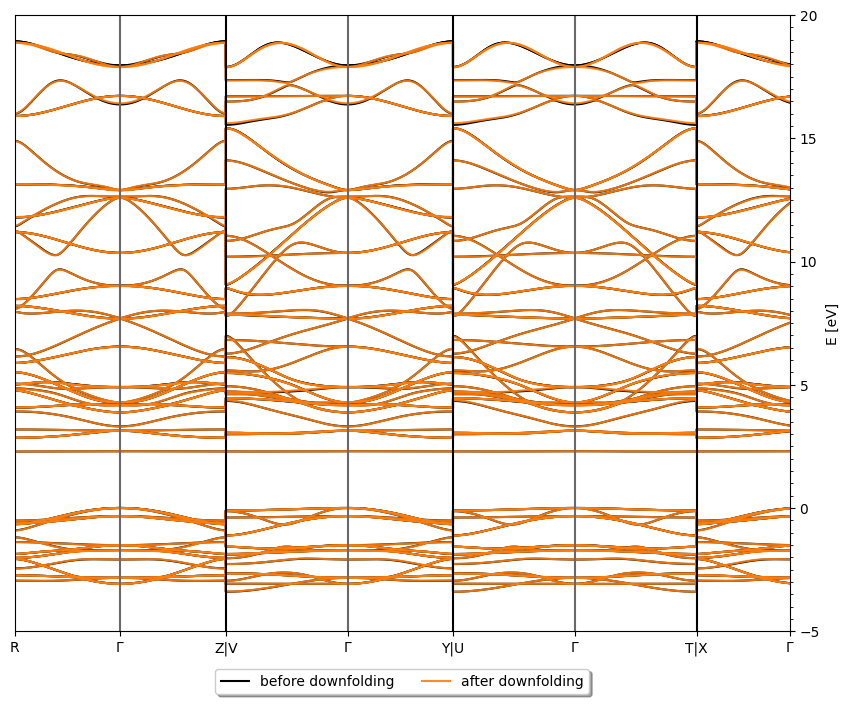

In [121]:
plt.figure(figsize=(10,8))
plot_bands("Ba3UO6")
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
loc = ticker.MultipleLocator(.5)
plt.gca().yaxis.set_minor_locator(loc)
plt.ylim(-5,20)
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=2)
plt.savefig("Ba3UO6_band_wanband.png",dpi=600, bbox_inches="tight")
plt.show()

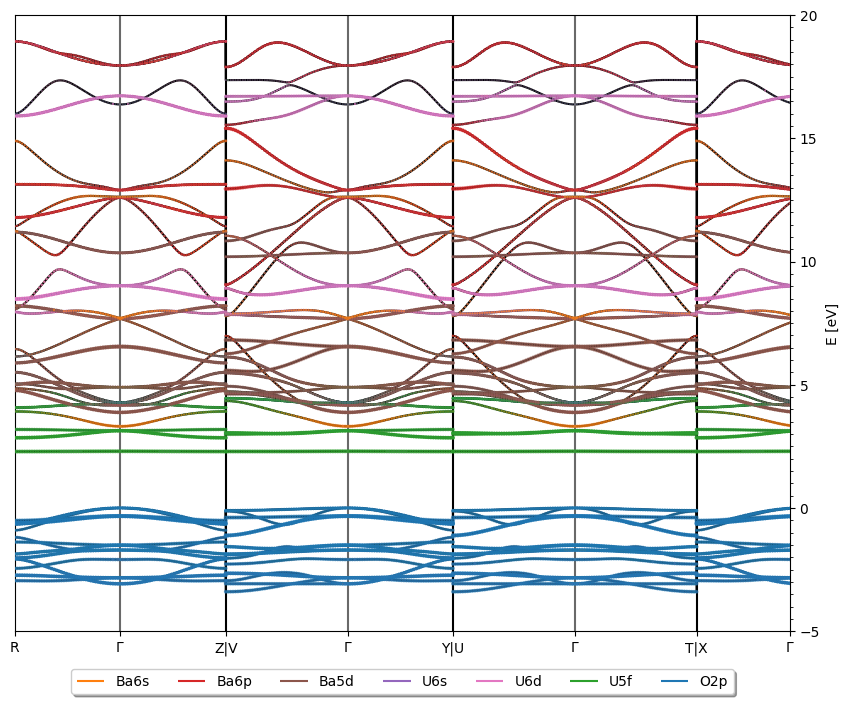

In [122]:
plt.figure(figsize=(10,8))
weights=["Ba6s","Ba6p","Ba5d","U6s","U6d","U5f","O2p"]
Color = ["tab:orange","tab:red","tab:brown","tab:purple","tab:pink","tab:green","tab:blue"]
plot_bweights("Ba3UO6",weights,Color)
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
loc = ticker.MultipleLocator(.5)
plt.gca().yaxis.set_minor_locator(loc)
plt.ylim(-5,20)
plt.gca().legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=7)
plt.savefig("Ba3UO6_band.png",dpi=600, bbox_inches="tight")
plt.show()